In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


In [2]:
def make_alldat():
    # Load participant.tsv file
    Tid=['102','103','104','105','106','107']
    # Load and join the files 
    alldat = []
    for s,sid in enumerate(Tid):  
        subj = pd.read_csv(f"/home/alily/Downloads/MDI Notebooks/behavioural data/MDI0_{sid}.dat")
        subj['SN']=s
        subj['SID']=sid
        subj["PosInQuartet"] = (subj["TN"]-1) % 4 + 1 
        alldat.append(subj)
    data = pd.concat(alldat)
    labels_dict = {1:'AAMA',2:'AARA',3:'AAAA'}
    data['Quartet']=data.QuartetType.map(labels_dict)
    data['correct']=data.numCorrectDigits==5
    return data 

In [3]:
data = make_alldat()

In [4]:
data.to_csv("alldat",index=False)

In [5]:
# Check if we have equal amount of data per subject 
pd.pivot_table(data,values='SID',index='SN',aggfunc='count')

,SID
SN,
0,576
1,576
2,576
3,576
4,576
5,576


<Axes: xlabel='Movement Time', ylabel='Count'>

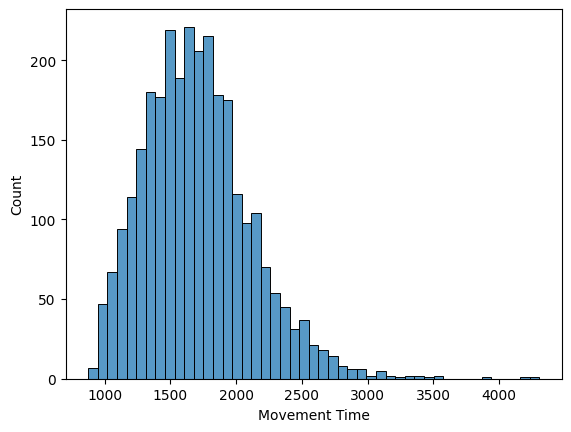

In [6]:
sns.histplot(data[data.correct],x='Movement Time')

<Axes: xlabel='BN', ylabel='Movement Time'>

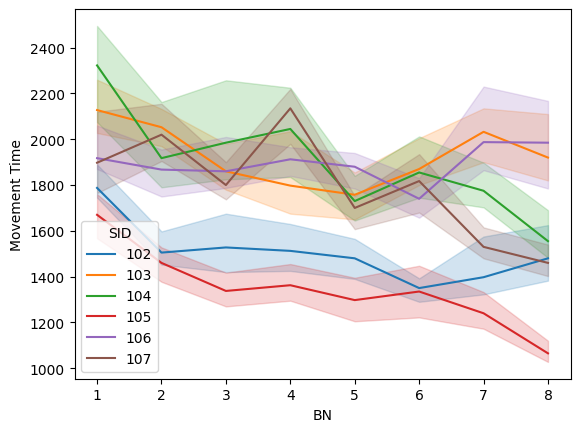

In [7]:
sns.lineplot(data,x='BN',y='Movement Time',hue='SID',estimator="median")

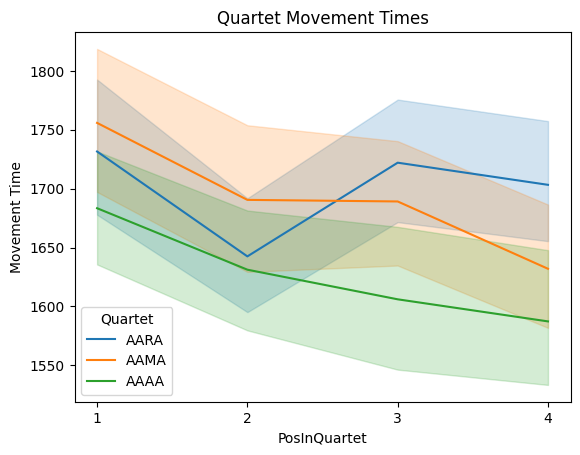

In [8]:
ax = sns.lineplot(data[data.correct & (data.BN>1)], x="PosInQuartet",y="Movement Time",hue="Quartet",estimator='mean')
ax.set(title="Quartet Movement Times")
ax.set_xticks([1,2,3,4])

Participants seem to be representing a subsequence, because it takes them longer to execute a ompletely random sequence than to execute a similar one to the previous one.
In an AARA, blue line, the movement time heads back up at the end of the quartet, like they're back to square one, with a blank slate wiped clean. 

In [9]:
grouped_quartets = data["Movement Time"].groupby(data["Quartet"])


f_statistic, p_value = f_oneway(grouped_quartets.groups["AARA"],grouped_quartets.groups["AAAA"],grouped_quartets.groups["AAMA"])

print(f"p={p_value}\nf={f_statistic}")

p=0.4599501475501933
f=0.7768118750835066


Not statistically significant

In [10]:
ax

<Axes: title={'center': 'Quartet Movement Times'}, xlabel='PosInQuartet', ylabel='Movement Time'>

<Axes: xlabel='BN', ylabel='Movement Time'>

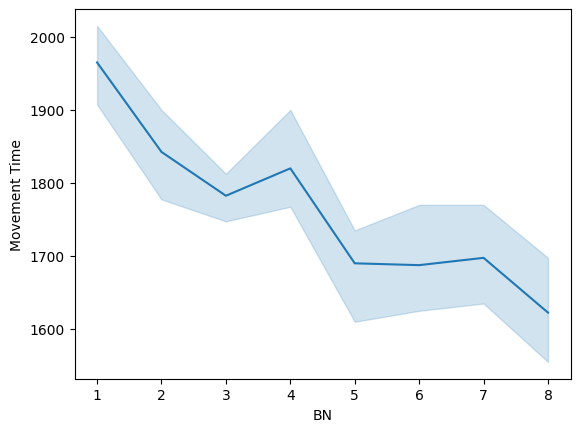

In [11]:
sns.lineplot(data,x="BN",y="Movement Time",estimator='median')

In [14]:
ipi = np.diff(data[data.BN>1][["reactionTime1","reactionTime2","reactionTime3","reactionTime4","reactionTime5"]])


ipi = pd.DataFrame(ipi)

data = data.join(ipi)

data

#what is 3rd IPI in every sequence by sequence position in Quartet and by Quartet Type?
#as in, for each sequence's position in the quartet, what is that sequence's 3rd IPI by quartet type?




,BN,TN,startTR,startTRReal,startTimeReal,planTime,execTime,feedbackTime,iti,expectedDigit1,...,QuartetType,SN,SID,PosInQuartet,Quartet,correct,0,1,2,3
0,1,1,0,6,5000,0,5000,1000,500,1,...,3,0,102,1,AAAA,True,200,225,205,160
1,1,2,0,10,9310,0,5000,1000,500,1,...,3,0,102,2,AAAA,True,180,160,150,130
2,1,3,0,14,13936,0,5000,1000,500,1,...,3,0,102,3,AAAA,True,205,215,150,315
3,1,4,0,18,17015,0,5000,1000,500,1,...,3,0,102,4,AAAA,False,160,190,145,135
4,1,5,0,21,20766,0,5000,1000,500,1,...,2,0,102,1,AARA,True,200,195,315,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,8,68,0,294,293625,1200,5000,1000,500,2,...,3,5,107,4,AAAA,True,260,245,305,315
572,8,69,0,298,297570,1200,5000,1000,500,1,...,1,5,107,1,AAMA,True,270,330,405,275
573,8,70,0,302,301635,1200,5000,1000,500,1,...,1,5,107,2,AAMA,True,235,260,260,135
574,8,71,0,306,305845,1200,5000,1000,500,1,...,1,5,107,3,AAMA,True,250,265,500,720


In [15]:
ipi = pd.melt(data, id_vars=["QuartetType","PosInQuartet"], value_vars=[0,1,2,3],var_name="# IPI",value_name="IPI")

In [16]:
labels_dict = {1:'AAMA',2:'AARA',3:'AAAA'}
ipi['Quartet']=ipi.QuartetType.map(labels_dict)

ipi

,QuartetType,PosInQuartet,# IPI,IPI,Quartet
0,3,1,0,200,AAAA
1,3,2,0,180,AAAA
2,3,3,0,205,AAAA
3,3,4,0,160,AAAA
4,2,1,0,200,AARA
...,...,...,...,...,...
13819,3,4,3,315,AAAA
13820,1,1,3,275,AAMA
13821,1,2,3,135,AAMA
13822,1,3,3,720,AAMA


In [17]:
ipi_AMMA = ipi[(ipi["QuartetType"] == 1)]
ipi_AMMA_end_of_Quartet = ipi_AMMA[(ipi_AMMA["PosInQuartet"]==4)]

grouped_ipi_AAMA = ipi_AMMA_end_of_Quartet["IPI"].groupby(ipi_AMMA_end_of_Quartet["# IPI"],sort=False)



f2_statistic, p2_value = f_oneway(grouped_ipi_AAMA.groups[0],grouped_ipi_AAMA.groups[1],grouped_ipi_AAMA.groups[2],grouped_ipi_AAMA.groups[3])

print(f'p2={p2_value}\nf2={f2_statistic}')

p2=0.0
f2=5745.3607299214


In [38]:
ipi_AMMA

,QuartetType,PosInQuartet,# IPI,IPI,Quartet
8,1.0,1,0,420.0,AAMA
9,1.0,2,0,540.0,AAMA
10,1.0,3,0,335.0,AAMA
11,1.0,4,0,425.0,AAMA
20,1.0,1,0,420.0,AAMA
...,...,...,...,...,...
15731476,1.0,4,3,210.0,AAMA
15731501,1.0,1,3,785.0,AAMA
15731502,1.0,2,3,740.0,AAMA
15731503,1.0,3,3,370.0,AAMA


In [39]:
grouped_ipi_AAMA.groups

{0: [11, 23, 31, 47, 63, 67, 79, 115, 119, 123, 131, 135, 171, 175, 183, 191, 207, 215, 219, 247, 259, 263, 279, 283, 291, 303, 307, 331, 335, 355, 371, 375, 383, 387, 423, 431, 459, 479, 483, 491, 499, 503, 531, 551, 555, 563, 571, 575], 1: [4194887, 4194899, 4194907, 4194923, 4194939, 4194943, 4194955, 4194991, 4194995, 4194999, 4195007, 4195011, 4195047, 4195051, 4195059, 4195067, 4195083, 4195091, 4195095, 4195123, 4195135, 4195139, 4195155, 4195159, 4195167, 4195179, 4195183, 4195207, 4195211, 4195231, 4195247, 4195251, 4195259, 4195263, 4195299, 4195307, 4195335, 4195355, 4195359, 4195367, 4195375, 4195379, 4195407, 4195427, 4195431, 4195439, 4195447, 4195451], 2: [8389763, 8389775, 8389783, 8389799, 8389815, 8389819, 8389831, 8389867, 8389871, 8389875, 8389883, 8389887, 8389923, 8389927, 8389935, 8389943, 8389959, 8389967, 8389971, 8389999, 8390011, 8390015, 8390031, 8390035, 8390043, 8390055, 8390059, 8390083, 8390087, 8390107, 8390123, 8390127, 8390135, 8390139, 8390175, 83901

Text(0.5, 1.0, 'Last Trial of Modified Quartets')

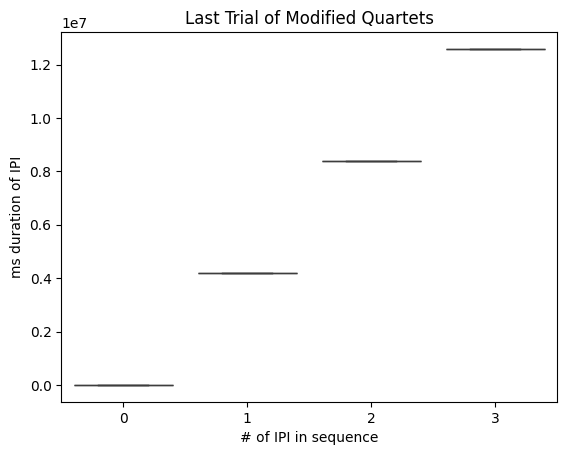

In [40]:
plt = sns.boxplot(data=grouped_ipi_AAMA.groups)

plt.set_xlabel("# of IPI in sequence")
plt.set_ylabel("ms duration of IPI")

plt.set_title("Last Trial of Modified Quartets")

Statistically significant! So the IPIs are in fact different!

In [71]:
ipi_AARA = ipi[(ipi["QuartetType"] == 2)]
ipi_AARA_end_of_Quartet = ipi_AARA[(ipi_AARA["PosInQuartet"]==4)]

grouped_ipi_AARA = ipi_AARA_end_of_Quartet["IPI"].groupby(ipi_AARA_end_of_Quartet["# IPI"])



f3_statistic, p3_value = f_oneway(grouped_ipi_AARA.groups[0],grouped_ipi_AARA.groups[1],grouped_ipi_AARA.groups[2],grouped_ipi_AARA.groups[3])

print(f'p2={p3_value}\nf2={f3_statistic}')

p2=1.4260287250823223e-112
f2=932.3020049993248


Text(0.5, 1.0, 'Last Trial of Random Quartets')

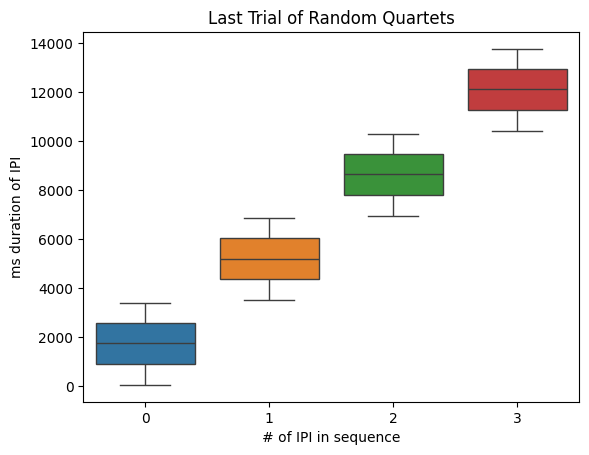

In [72]:
plt = sns.boxplot(data=grouped_ipi_AARA.groups)

plt.set_xlabel("# of IPI in sequence")
plt.set_ylabel("ms duration of IPI")

plt.set_title("Last Trial of Random Quartets")

In [73]:
ipi_AAAA = ipi[(ipi["QuartetType"] == 3)]
ipi_AAAA_end_of_Quartet = ipi_AAAA[(ipi_AAAA["PosInQuartet"]==4)]

grouped_ipi_AAAA = ipi_AAAA_end_of_Quartet["IPI"].groupby(ipi_AAAA_end_of_Quartet["# IPI"])



f4_statistic, p4_value = f_oneway(grouped_ipi_AAAA.groups[0],grouped_ipi_AAAA.groups[1],grouped_ipi_AAAA.groups[2],grouped_ipi_AAAA.groups[3])

print(f'p2={p4_value}\nf2={f4_statistic}')

p2=1.0426776739929385e-112
f2=935.6228114248604


Text(0.5, 1.0, 'Last Trial of Repetition Quartets')

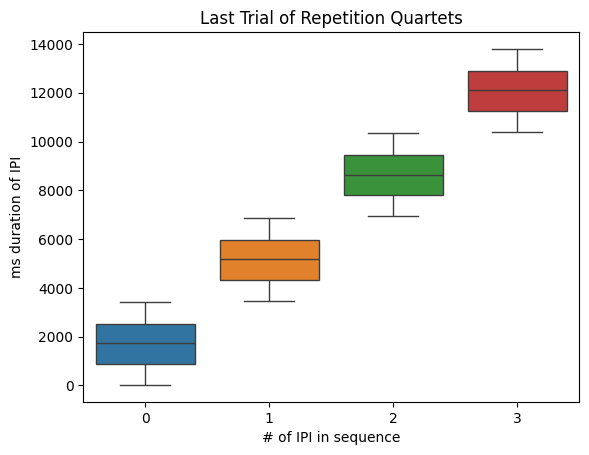

In [75]:
plt = sns.boxplot(data=grouped_ipi_AAAA.groups)

plt.set_xlabel("# of IPI in sequence")
plt.set_ylabel("ms duration of IPI")

plt.set_title("Last Trial of Repetition Quartets")

In [76]:
grouped_ipi_AAAA.groups

{0: [22, 90, 114, 258, 306, 330, 523, 547, 595, 619, 667, 859, 883, 907, 955, 1123, 1171, 1267, 1363, 1387, 1411, 1435, 1507, 1603, 1867, 1939, 2035, 2059, 2083, 2155, 2179, 2203, 2371, 2419, 2443, 2491, 2611, 2659, 2707, 2779, 2851, 2971, 3067, 3091, 3187, 3235, 3355, 3427], 1: [3479, 3547, 3571, 3715, 3763, 3787, 3980, 4004, 4052, 4076, 4124, 4316, 4340, 4364, 4412, 4580, 4628, 4724, 4820, 4844, 4868, 4892, 4964, 5060, 5324, 5396, 5492, 5516, 5540, 5612, 5636, 5660, 5828, 5876, 5900, 5948, 6068, 6116, 6164, 6236, 6308, 6428, 6524, 6548, 6644, 6692, 6812, 6884], 2: [6936, 7004, 7028, 7172, 7220, 7244, 7437, 7461, 7509, 7533, 7581, 7773, 7797, 7821, 7869, 8037, 8085, 8181, 8277, 8301, 8325, 8349, 8421, 8517, 8781, 8853, 8949, 8973, 8997, 9069, 9093, 9117, 9285, 9333, 9357, 9405, 9525, 9573, 9621, 9693, 9765, 9885, 9981, 10005, 10101, 10149, 10269, 10341], 3: [10393, 10461, 10485, 10629, 10677, 10701, 10894, 10918, 10966, 10990, 11038, 11230, 11254, 11278, 11326, 11494, 11542, 11638, 11

' \nQuartet  Types\n\n1 is repeating a sequence, then doing a modified one, then doing the original\n\n2 is repeating a sequence, then doing a random one, then doing the original\n\n3 is doing the same sequence four times\n'

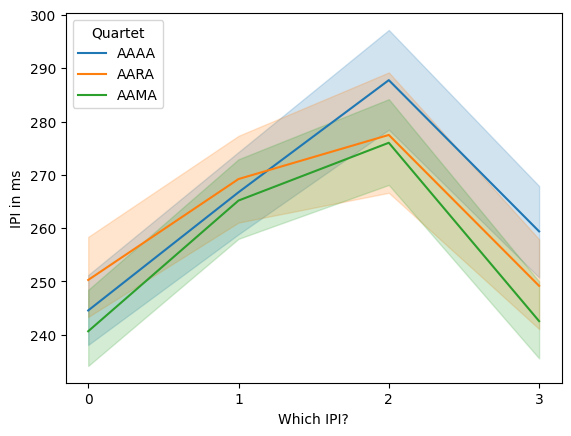

In [17]:
ax = sns.lineplot(ipi, y="IPI", x="# IPI", hue="Quartet")
ax.set_xlabel("Which IPI?")
ax.set_ylabel("IPI in ms")

ax.set_xticks([0,1,2,3])

""" 
Quartet  Types

1 is repeating a sequence, then doing a modified one, then doing the original

2 is repeating a sequence, then doing a random one, then doing the original

3 is doing the same sequence four times
"""

<Axes: xlabel='# IPI', ylabel='IPI'>

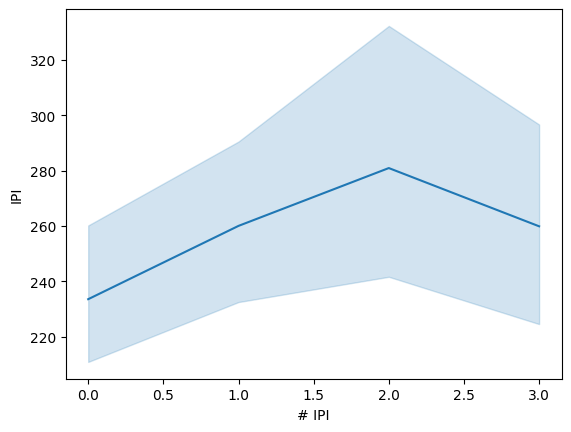

In [18]:
sns.lineplot(ipi[(ipi["PosInQuartet"]==3) & (ipi["QuartetType"]==1)],y="IPI", x="# IPI") # AFTER the modified digit the subjects took longer


<Axes: xlabel='# IPI', ylabel='IPI'>

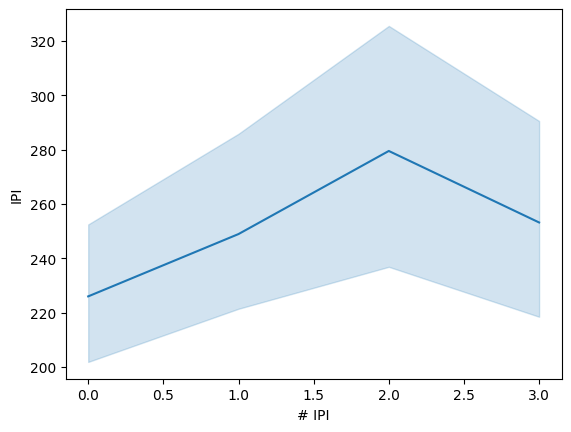

In [19]:
sns.lineplot(ipi[(ipi["PosInQuartet"]==4) & (ipi["QuartetType"]==1)],y="IPI", x="# IPI")

<Axes: xlabel='# IPI', ylabel='IPI'>

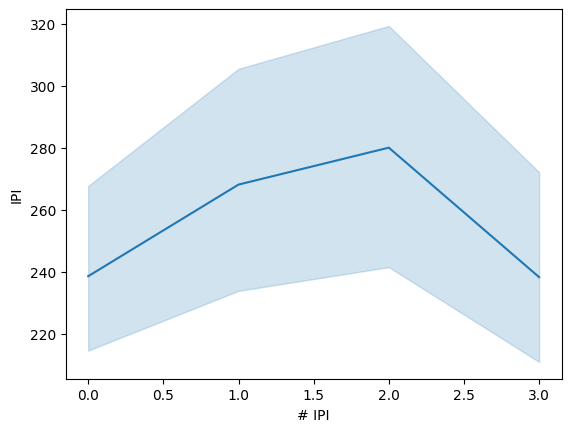

In [20]:
sns.lineplot(ipi[(ipi["PosInQuartet"]==2) & (ipi["QuartetType"]==1)],y="IPI", x="# IPI")